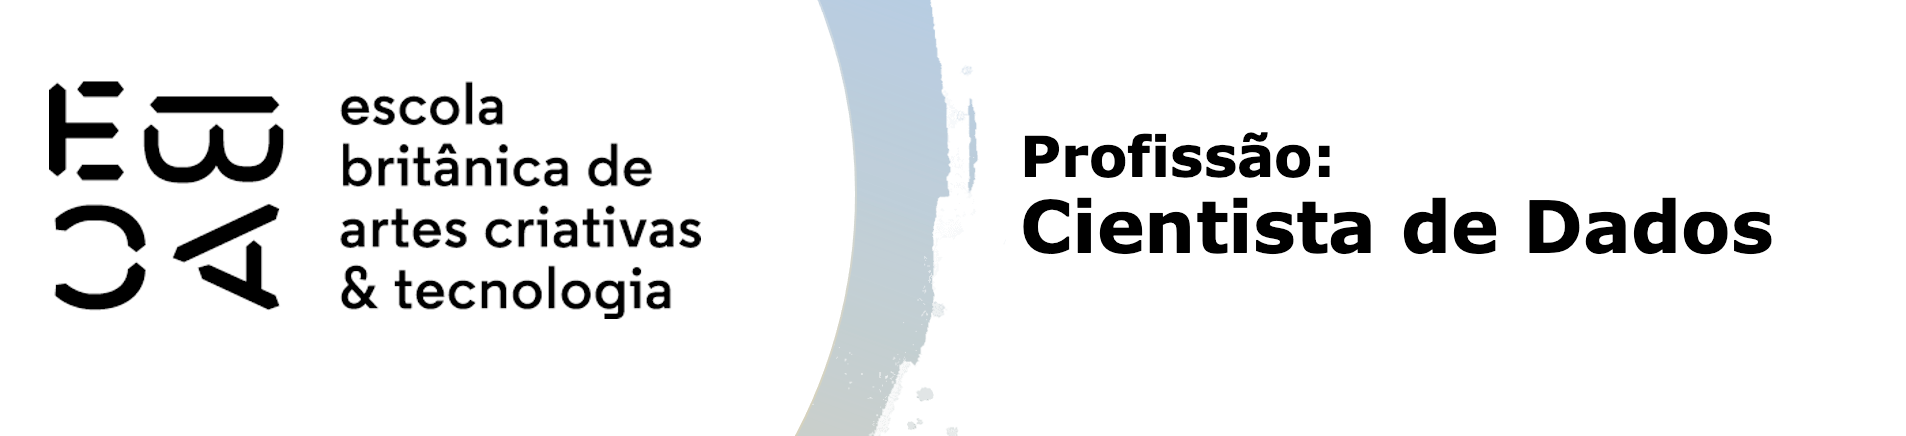

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
print("Valores missing por coluna:")
print(df.isnull().sum())



Valores missing por coluna:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [6]:
print("\nTipos de dados por coluna:")
df.info()


Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  

In [7]:
print("\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


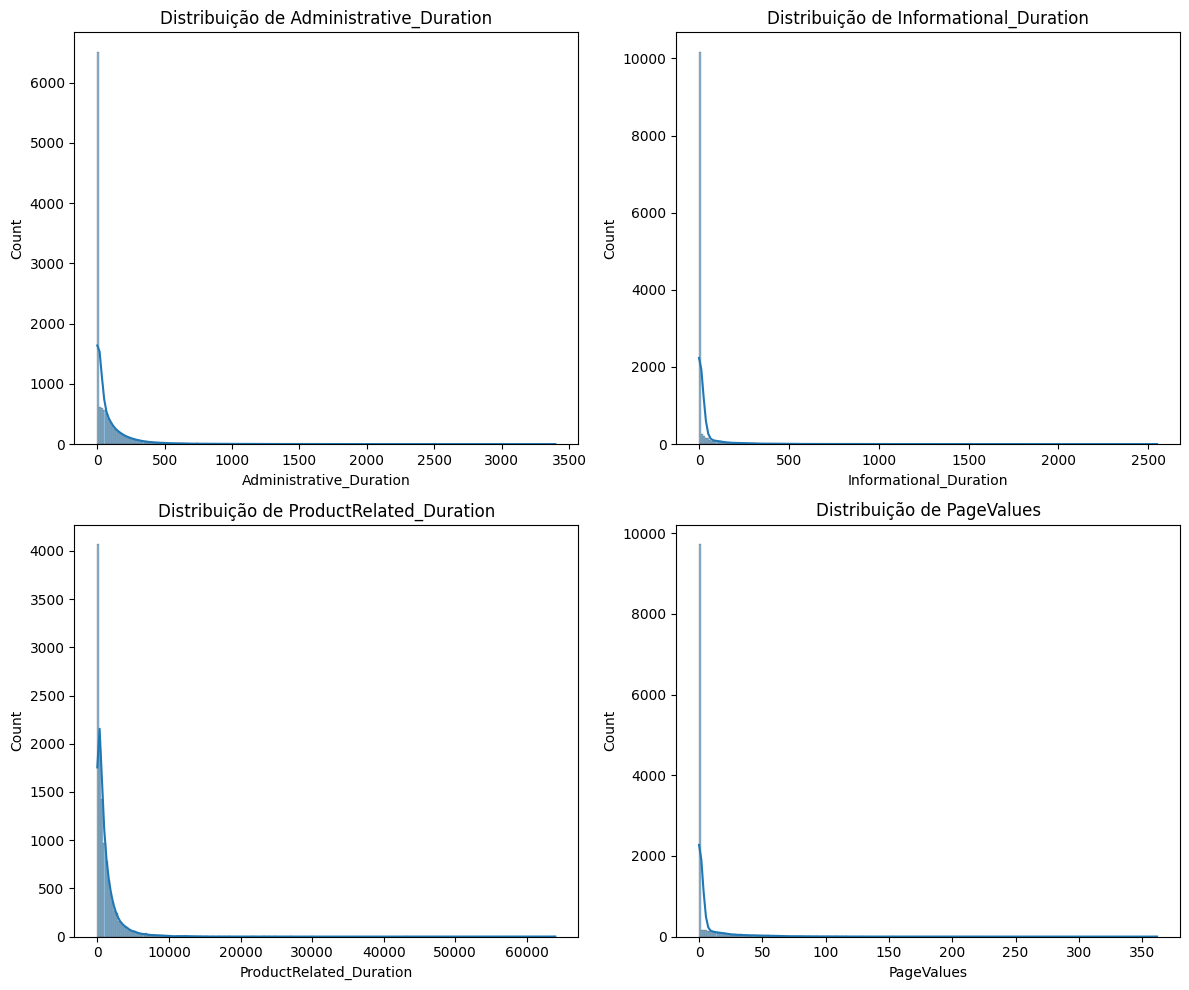

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['Administrative_Duration'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribuição de Administrative_Duration')
sns.histplot(df['Informational_Duration'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribuição de Informational_Duration')
sns.histplot(df['ProductRelated_Duration'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribuição de ProductRelated_Duration')
sns.histplot(df['PageValues'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribuição de PageValues')
plt.tight_layout()
plt.show()

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [9]:
print('Vamos relembrar quais são as colunas do nosso DataFrame:')
df.columns.tolist()

Vamos relembrar quais são as colunas do nosso DataFrame:


['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [10]:
nav_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

date_vars = ['SpecialDay', 'Weekend', 'Month']

cat_vars = ['Month', 'VisitorType']

num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(), cat_vars)
    ])

features = num_vars + cat_vars
df_cluster = df[features].copy()

df_cluster['Weekend'] = df_cluster['Weekend'].astype(int)

df_processed = preprocessor.fit_transform(df_cluster)

print("Shape do df processado:", df_processed.shape)

Shape do df processado: (12330, 24)


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['grupo_3'] = cluster_3.fit_predict(df_processed)

cluster_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['grupo_4'] = cluster_4.fit_predict(df_processed)

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [12]:
print("Análise descritiva para 3 grupos:")
display(df.groupby('grupo_3')[num_vars].mean())

print("\nAnálise descritiva para 4 grupos:")
display(df.groupby('grupo_4')[num_vars].mean())

df['grupo_final'] = df['grupo_3']

Análise descritiva para 3 grupos:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend
grupo_3,,,,,,,,,,,
0,2.294329,80.172497,0.434603,21.064730,29.914853,1109.527866,0.012665,0.034894,6.205180,0.065801,0.234726
1,0.020313,0.000000,0.007812,0.000000,1.365625,6.436484,0.198985,0.199301,0.000000,0.000000,0.189062
2,8.040268,279.088534,4.204698,621.057934,166.392617,7004.564061,0.006686,0.020215,6.460208,0.026174,0.244966



Análise descritiva para 4 grupos:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend
grupo_4,,,,,,,,,,,
0,2.386548,84.089056,0.450177,21.828968,30.080921,1123.082625,0.010311,0.032350,6.567940,0.008961,0.240375
1,1.250811,35.853981,0.258378,12.416864,28.035676,956.146613,0.039299,0.063684,2.100303,0.708973,0.170811
2,8.040268,279.088534,4.204698,621.057934,166.392617,7004.564061,0.006686,0.020215,6.460208,0.026174,0.244966
3,0.020313,0.000000,0.007812,0.000000,1.365625,6.436484,0.198985,0.199301,0.000000,0.000000,0.189062


### Sugestão de nomes para os grupos (exemplo para 3 grupos)
- Grupo 0: Engajamento moderado.
- Grupo 1: Baixo engajamento.
- Grupo 2: Alto engajamento.
 
### Vamos escolher o agrupamento de 3 grupos para a avaliação final.

- O grupo 0 é intermediário.
- O grupo 1 tem valores baixos em geral.
- O grupo 2 se destaca com valores altos em duração e PageValues, indicando sessões mais valiosas.

---

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

Avaliação dos grupos em relação a BounceRates e Revenue:
             BounceRates   Revenue
grupo_final                       
0               0.012665  0.158796
1               0.198985  0.004687
2               0.006686  0.322148


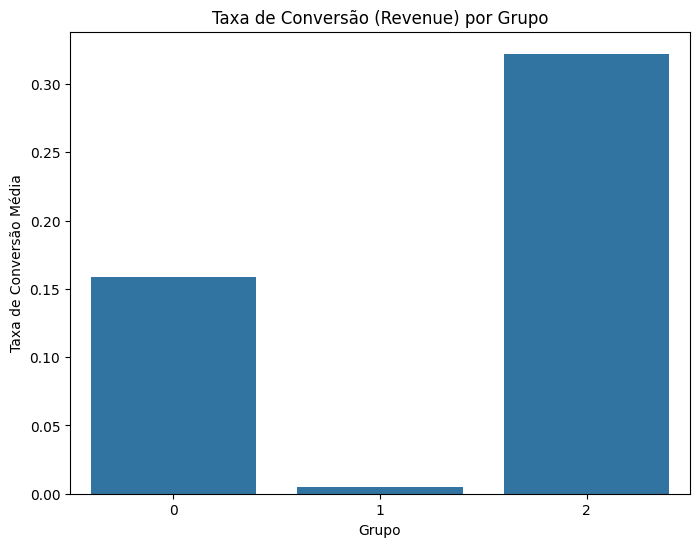

In [13]:
print("Avaliação dos grupos em relação a BounceRates e Revenue:")
print(df.groupby('grupo_final')[['BounceRates', 'Revenue']].mean())

plt.figure(figsize=(8, 6))
sns.barplot(x='grupo_final', y='Revenue', data=df, errorbar=None)
plt.title('Taxa de Conversão (Revenue) por Grupo')
plt.ylabel('Taxa de Conversão Média')
plt.xlabel('Grupo')
plt.show()

# O grupo 2 possui a maior taxa de conversão (Revenue), indicando que são os clientes mais propensos à compra.
# Este grupo também tem uma taxa de bounce (BounceRates) relativamente baixa em comparação com o grupo 0.
# O grupo 1 tem a menor taxa de conversão e a maior taxa de bounce.
# O grupo 0 tem uma taxa de conversão intermediária.
    
# Conclusão: O Grupo 2, que podemos chamar de "Clientes de Alto Valor", é o mais propenso à compra.
# Eles passam mais tempo no site, visitam mais páginas de produtos e têm um PageValue maior.

- O grupo 2 possui a maior taxa de conversão (Revenue), indicando que são os clientes mais propensos à compra.
Este grupo também tem uma taxa de bounce (BounceRates) relativamente baixa em comparação com o grupo 0.

- O grupo 1 tem a menor taxa de conversão e a maior taxa de bounce.
- O grupo 0 tem uma taxa de conversão intermediária.
    
### Conclusão: O Grupo 2, que podemos chamar de "Clientes de Alto Valor", é o mais propenso à compra.
### Eles passam mais tempo no site, visitam mais páginas de produtos e têm um PageValue maior.